# Import Data

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.utils import to_categorical

C:\Users\molly\anaconda3\envs\PythonData\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\molly\anaconda3\envs\PythonData\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\molly\anaconda3\envs\PythonData\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\molly\anaconda3\envs\PythonData\lib\site-packages

In [2]:
# read file
csv_file = "clean_movies.csv"

# store .csv into dataframe
movies_df = pd.read_csv(csv_file)
movies_df.head()

,performance,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,...,lifetime_gross,nrOfNewsArticles,nrOfNominations,nrOfPhotos,nrOfUserReviews,nrOfWins,ratingCount,ratingInteger,title,year
0,Success,0,0,0,0,0,0,0,0,1,...,1236166,428,4,67,376,3,81007,8,METROPOLIS,1927
1,Success,0,0,0,0,0,1,0,0,1,...,19181,187,0,38,186,2,70057,9,CITY LIGHTS,1931
2,Success,0,0,0,0,0,1,0,0,1,...,163577,27,1,44,180,3,90847,9,MODERN TIMES,1936
3,Success,0,0,0,0,0,0,0,0,1,...,198676459,1263,6,143,653,10,160414,8,GONE WITH THE WIND,1939
4,Success,0,0,1,0,0,0,0,0,0,...,22342633,2363,12,126,477,6,209506,8,THE WIZARD OF OZ,1939


In [3]:
y = movies_df['performance']
X = movies_df.drop(['title','performance', 'ratingInteger'], axis = 1)

# Scale and Transform Data

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 2)

In [5]:
X_scaler = MinMaxScaler().fit(X_train)

In [6]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [7]:
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
encoded_y_train = label_encoder.transform(y_train)
encoded_y_test = label_encoder.transform(y_test)
# y_train_categorical = to_categorical(encoded_y_train)
# y_test_categorical = to_categorical(encoded_y_train)

# K Nearest Neighbors

In [9]:
train_scores = []
test_scores = []
ktesting = 40
for k in range(1, ktesting, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/TestScore: {train_score: .3f}/{test_score:.3f}")

k: 1, Train/TestScore:  1.000/0.840
k: 3, Train/TestScore:  0.901/0.859
k: 5, Train/TestScore:  0.877/0.841
k: 7, Train/TestScore:  0.868/0.851
k: 9, Train/TestScore:  0.858/0.839
k: 11, Train/TestScore:  0.857/0.844
k: 13, Train/TestScore:  0.855/0.845
k: 15, Train/TestScore:  0.853/0.841
k: 17, Train/TestScore:  0.847/0.839
k: 19, Train/TestScore:  0.843/0.840
k: 21, Train/TestScore:  0.843/0.838
k: 23, Train/TestScore:  0.842/0.839
k: 25, Train/TestScore:  0.840/0.839
k: 27, Train/TestScore:  0.838/0.831
k: 29, Train/TestScore:  0.837/0.831
k: 31, Train/TestScore:  0.838/0.832
k: 33, Train/TestScore:  0.835/0.830
k: 35, Train/TestScore:  0.836/0.832
k: 37, Train/TestScore:  0.839/0.838
k: 39, Train/TestScore:  0.839/0.837


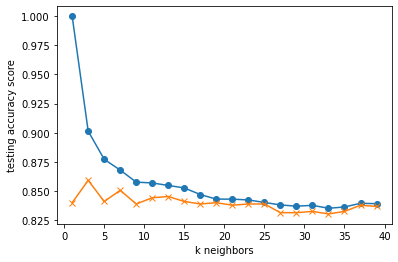

In [17]:
plt.plot(range(1, ktesting, 2), train_scores, marker = 'o')
plt.plot(range(1, ktesting, 2), test_scores, marker = 'x')
plt.xlabel('k neighbors')
plt.ylabel('testing accuracy score')
plt.savefig("Resources/KNN")
plt.show()

In [11]:
knn = KNeighborsClassifier(n_neighbors = 17)
knn.fit(X_train_scaled, y_train)
print('k=17 Test Accuracy: %.3f'% knn.score(X_test_scaled, y_test))

k=17 Test Accuracy: 0.839
